# Keyness Analysis

* EMI types vs. left/right
* EMI types vs. disagree/no_disagreement
* left/right vs. disagree/no_disagreement

In [1]:
import pandas as pd
from collections import Counter
from scipy.stats import norm

In [2]:
subreddits = ["Ask_Politics", "Askpolitics", "NeutralPolitics", "PoliticalDebate", "PoliticalDiscussion", "politics"]

In [3]:
scores = "non_clipped"

In [4]:
# data with correct labels

EMI_df = pd.read_csv(f"../../data/analysis_data/df_all_{scores}.csv")
EMI_df

/tmp/ipykernel_2344/1527393834.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  EMI_df = pd.read_csv(f"../../data/analysis_data/df_all_{scores}.csv")


,msg_id_parent,msg_id_child,submission_id,subreddit,exact_time_child,author_child,author_parent,author_submission,finetuned_child_E_norm,finetuned_child_I_norm,...,finetuned_parent_len_norm_z_trans_EMI,finetuned_child_len_norm_z_trans_EMI,finetuned_submission_len_norm_z_trans_EMI,self_parent_len_norm_z_trans_EMI,self_child_len_norm_z_trans_EMI,self_submission_len_norm_z_trans_EMI,predictions_label_ft,predictions_score_ft,predictions_prob_disagree,predictions_ft
0,c7ecp8d,c7ecs2n,14m325,Ask_Politics,1355166551.0,karmanaut,Ramblin_Dash,karmanaut,0.053025,0.072843,...,0.514532,-0.116730,0.594431,0.624110,-0.011457,0.172262,0,0.6180,0.38180,no_disagreement
1,c7ecp8d,c7ecxpk,14m325,Ask_Politics,1355167049.0,zoolander951,Ramblin_Dash,karmanaut,0.040605,0.001874,...,0.514532,0.363800,0.594431,0.624110,0.012864,0.172262,0,0.7134,0.28640,no_disagreement
2,c7ecp8d,c7eflag,14m325,Ask_Politics,1355175187.0,zossima,Ramblin_Dash,karmanaut,0.037034,-0.026841,...,0.514532,0.571814,0.594431,0.624110,0.600814,0.172262,0,0.6580,0.34180,no_disagreement
3,c7efx8q,c7ejh1d,14m325,Ask_Politics,1355187644.0,fathermocker,senatorskeletor,karmanaut,0.046751,0.040446,...,0.269966,0.096978,0.594431,0.130100,0.070296,0.172262,1,0.9507,0.95070,disagree
4,c7efx8q,c7f8140,14m325,Ask_Politics,1355286254.0,PKMKII,senatorskeletor,karmanaut,0.029991,-0.043360,...,0.269966,0.644853,0.594431,0.130100,0.612353,0.172262,0,0.8580,0.14180,no_disagreement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938799,kfkh5ib,kfmd52k,18uirzt,politics,1970-01-01 00:00:01.703977996,Knightforlife,freddiethebaer,optimalg,0.289315,0.222072,...,1.250681,0.671616,-0.580210,1.062374,0.498045,-0.857240,0,0.9550,0.04495,no_disagreement
4938800,kfklsb6,kforzbx,18uirzt,politics,1970-01-01 00:00:01.704023024,bakerfredricka,4blockhead,optimalg,0.192579,0.210383,...,1.367783,-0.043416,-0.580210,1.165189,-0.381238,-0.857240,0,0.9920,0.00774,no_disagreement
4938801,kfmq5kr,kfp6tzv,18uirzt,politics,1970-01-01 00:00:01.704032059,glassjar1,DoubleTFan,optimalg,0.078374,0.101258,...,-0.197753,-0.140261,-0.580210,0.242695,-0.122822,-0.857240,1,0.8500,0.85000,disagree
4938802,kfp3d4v,kfp8xh8,18uirzt,politics,1970-01-01 00:00:01.704033069,HaulinBoats,4blockhead,optimalg,0.137089,0.224533,...,0.600514,-0.617072,-0.580210,0.207855,-0.789836,-0.857240,0,0.9414,0.05875,no_disagreement


In [5]:
# Tokens

tokens_data = {}
tokens_df = pd.DataFrame()

for subr in subreddits:
    
    data = pd.read_csv(f"../../EMI/reddit_data/01_after_pool/output_{scores}/{subr}_tokens.csv")
    tokens_data[subr] = data
    
    tokens_df = pd.concat([tokens_df, data]).reset_index(drop = True)

tokens_df

,msg_id_parent,msg_id_child,submission_id,subreddit,exact_time_child,author_child,author_parent,author_submission,parent_tokens,parent_len,...,finetuned_child_tokens_for_E,finetuned_child_tokens_for_I,finetuned_submission_tokens_for_E,finetuned_submission_tokens_for_I,self_parent_tokens_for_E,self_parent_tokens_for_I,self_child_tokens_for_E,self_child_tokens_for_I,self_submission_tokens_for_E,self_submission_tokens_for_I
0,c7ecp8d,c7ecs2n,14m325,Ask_Politics,1355166551.0,karmanaut,Ramblin_Dash,karmanaut,regarding perry vs brown current name prop cas...,65,...,olson extremely good keeping track sort thing ...,ted extremely good keeping track sort thing mu...,regarding doma nd regarding california prop ba...,regarding nd regarding prop ban think justices...,regarding current case think plaintiffs et all...,regarding current name case think plaintiffs t...,extremely good track sort thing much better an...,olson extremely good sort thing much anyone su...,regarding regarding ban think come,regarding regarding think
1,c7ecp8d,c7ecxpk,14m325,Ask_Politics,1355167049.0,zoolander951,Ramblin_Dash,karmanaut,regarding perry vs brown current name prop cas...,65,...,quick note think calling hollingsworth v attor...,quick note think calling attorney general want...,regarding doma nd regarding california prop ba...,regarding nd regarding prop ban think justices...,regarding current case think plaintiffs et all...,regarding current name case think plaintiffs t...,quick note think attorney general defend case ...,quick note think calling general want defend c...,regarding regarding ban think come,regarding regarding think
2,c7ecp8d,c7eflag,14m325,Ask_Politics,1355175187.0,zossima,Ramblin_Dash,karmanaut,regarding perry vs brown current name prop cas...,65,...,scotus already overridden state law cases invo...,scotus already overridden state law cases th a...,regarding doma nd regarding california prop ba...,regarding nd regarding prop ban think justices...,regarding current case think plaintiffs et all...,regarding current name case think plaintiffs t...,already law cases involving amendment equal pr...,law amendment protection gay rights precedent ...,regarding regarding ban think come,regarding regarding think
3,c7efx8q,c7ejh1d,14m325,Ask_Politics,1355187644.0,fathermocker,senatorskeletor,karmanaut,suspect going split baby striking doma upholdi...,123,...,think either uphold prop dodge think strike pr...,think either uphold prop dodge think strike pr...,regarding doma nd regarding california prop ba...,regarding nd regarding prop ban think justices...,suspect side history laws disclaimer included ...,suspect upholding want right side history upho...,think either dodge think much constitutional l...,think either uphold dodge think much constitut...,regarding regarding ban think come,regarding regarding think
4,c7efx8q,c7f8140,14m325,Ask_Politics,1355286254.0,PKMKII,senatorskeletor,karmanaut,suspect going split baby striking doma upholdi...,123,...,possible could strike prop word ruling specifi...,possible could strike prop word ruling specifi...,regarding doma nd regarding california prop ba...,regarding nd regarding prop ban think justices...,suspect side history laws disclaimer included ...,suspect upholding want right side history upho...,possible word ruling specifically applies situ...,possible word ruling specifically applies situ...,regarding regarding ban think come,regarding regarding think
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953546,kfkh5ib,kfmd52k,18uirzt,politics,1970-01-01 00:00:01.703977996,Knightforlife,freddiethebaer,optimalg,jen sorensen future veterans information wars,6,...,fact checking doesnt work one hears alarming true,fact checking doesnt work one hears alarming true,saturday folks let back share feel free share ...,folks let back share cartoons feel free share ...,information,information,fact checking work one hears alarming true,fact checking hears alarming true,share 

Rows can contain NaN's if i.e. a child has no I-positive words $\to$ no EMI score

* take all texts, merge tokens and concatenate, then drop
* if a child has no EMI, the parent can still contribute to keyness

In [6]:
EMI_df[EMI_df.isnull().any(axis=1)]

,msg_id_parent,msg_id_child,submission_id,subreddit,exact_time_child,author_child,author_parent,author_submission,finetuned_child_E_norm,finetuned_child_I_norm,...,finetuned_parent_len_norm_z_trans_EMI,finetuned_child_len_norm_z_trans_EMI,finetuned_submission_len_norm_z_trans_EMI,self_parent_len_norm_z_trans_EMI,self_child_len_norm_z_trans_EMI,self_submission_len_norm_z_trans_EMI,predictions_label_ft,predictions_score_ft,predictions_prob_disagree,predictions_ft
23322,dndrvjw,dng4u4l,71v8rr,Ask_Politics,1506276675.0,Ronald-Hapchwarae,HiFidelityCastro,PrecookedEagle,NaN,NaN,...,-1.369760,NaN,-0.768807,-0.890489,NaN,-0.433912,0,0.9526,0.04745,no_disagreement
31933,en6fg2g,en6gjiw,bmetye,Ask_Politics,1557630434.0,OxymoronicallyAbsurd,Quetzalcoatls,OxymoronicallyAbsurd,0.101755,0.096608,...,0.859292,0.138972,NaN,0.781981,-0.132313,NaN,0,0.9814,0.01843,no_disagreement
42539,fy9qj9m,fya1dqt,hsbxhb,Ask_Politics,1594924260.0,floating_bells_down,LonelyNarwhal,floating_bells_down,NaN,NaN,...,-0.403764,NaN,-0.229096,-0.281348,NaN,-0.543555,0,0.9940,0.00574,no_disagreement
72871,c5e1xcj,c5e3aop,wk4bv,PoliticalDiscussion,1342306631.0,Impulse97,rustyarrowhead,TheMentatBashar,NaN,NaN,...,-0.386899,NaN,-0.825575,-0.239010,NaN,-1.028762,0,0.7856,0.21410,no_disagreement
84036,c6qj5tk,c6qjfgb,11y2ua,PoliticalDiscussion,1351004371.0,newpolitics,txking12,newpolitics,-0.142458,-0.289626,...,NaN,1.119183,0.149322,NaN,1.138499,0.456391,0,0.9795,0.02045,no_disagreement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848952,jezpelx,jezpij3,12bqlrc,politics,1970-01-01 00:00:01.680655316,CardMechanic,poky2017,PoliticsModeratorBot,NaN,NaN,...,1.368682,NaN,-0.309337,1.611648,NaN,-0.050898,0,0.9300,0.06964,no_disagreement
4904149,k3bu54n,k3bub2y,16yy9i6,politics,1970-01-01 00:00:01.696362558,Lucky-Earther,szboy422,PoliticsModeratorBot,NaN,NaN,...,0.368310,NaN,-0.323166,0.926728,NaN,-0.014768,0,0.5460,0.45400,no_disagreement
4908130,k3chis1,k3chugj,16z3s32,politics,1970-01-01 00:00:01.696370677,HeLooks2Muuuch,NateGrey,PoliticsModeratorBot,NaN,NaN,...,0.795725,NaN,0.548592,0.765175,NaN,0.686053,0,0.6953,0.30470,no_disagreement
4912801,k5a3ejc,k5a3ib5,17a06s3,politics,1970-01-01 00:00:01.697561611,SpaceElevatorMusic,worriedjacket,PoliticsModeratorBot,NaN,NaN,...,-1.295026,NaN,0.136453,-0.957208,NaN,0.594228,1,0.8650,0.86500,disagree


In [7]:
# merge tokens to EMI df

EMI_df = EMI_df.merge(tokens_df[["msg_id_parent", "msg_id_child", "submission_id", 
                        "parent_tokens", "parent_len", 
                        "child_tokens", "child_len", 
                        "submission_tokens", "submission_len"]], 
                        left_on = ["msg_id_parent", "msg_id_child", "submission_id"],
                        right_on = ["msg_id_parent", "msg_id_child", "submission_id"])

## Make relevant df

* for EMI keyness: drop duplicates in msg id parent and child
    * a text is either E or I
* for disagree keyness
    * do not drop duplicates on comments here, because a comment can have multiple replies with multiple labels: agree/disagree
    * take words into consideration twice: once for agree once for disagree
    
* also, leave out submissions for keyness: labels only relate to comments and replies

In [8]:
# finetuned

parents_finetuned = EMI_df[['msg_id_parent', 'author_parent','parent_tokens', 'parent_len', 
                            'finetuned_parent_len_EMI_z_trans', 'finetuned_parent_len_norm_z_trans_EMI', 
                            'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_parent').reset_index(drop = True)



parents_finetuned = parents_finetuned.rename(columns = {'msg_id_parent': 'id', 'author_parent' : 'author', 'parent_tokens' : 'tokens', 'parent_len': 'len',
                                                        'finetuned_parent_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                        'finetuned_parent_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


parents_finetuned['type'] = 'parent'

# ---------------------------------------------------
children_finetuned = EMI_df[['msg_id_child', 'author_child', 'child_tokens', 'child_len', 
                             'finetuned_child_len_EMI_z_trans', 'finetuned_child_len_norm_z_trans_EMI',
                             'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_child').reset_index(drop = True)


children_finetuned = children_finetuned.rename(columns = {'msg_id_child': 'id',  'author_child' : 'author', 'child_tokens' : 'tokens', 'child_len': 'len',
                                                          'finetuned_child_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                          'finetuned_child_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


children_finetuned['type'] = 'child'
# ---------------------------------------------------
submissions_finetuned = EMI_df[['submission_id', 'author_submission', 'submission_tokens', 'submission_len',
                                'finetuned_submission_len_EMI_z_trans','finetuned_submission_len_norm_z_trans_EMI',
                                'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'submission_id').reset_index(drop = True)


submissions_finetuned = submissions_finetuned.rename(columns = {'submission_id': 'id', 'author_submission' : 'author', 'submission_tokens' : 'tokens', 'submission_len': 'len',
                                                                'finetuned_submission_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                                'finetuned_submission_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


submissions_finetuned['type'] = 'submission'



texts_finetuned_EMI = pd.concat([parents_finetuned, children_finetuned]).reset_index(drop = True)
texts_finetuned_EMI


,id,author,tokens,len,finetuned_len_EMI_z_trans,finetuned_len_norm_z_trans_EMI,predictions_score_ft,predictions_ft,type
0,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.476542,0.514532,0.6180,no_disagreement,parent
1,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.269695,0.269966,0.9507,disagree,parent
2,c7edr13,TehNoff,wrong,1,-1.058486,-0.620579,0.8633,no_disagreement,parent
3,c7ee45j,IBiteYou,adhering askscience style moderation could ela...,6,0.249878,0.296310,0.9126,no_disagreement,parent
4,c7ejopx,DublinBen,promote,1,-0.921904,-0.907752,0.9395,no_disagreement,parent
...,...,...,...,...,...,...,...,...,...
6916399,kfmd52k,Knightforlife,fact checking doesnt work one hears alarming true,8,0.757736,0.671616,0.9550,no_disagreement,child
6916400,kforzbx,bakerfredricka,spot interpretation really going,4,-0.200630,-0.043416,0.9920,no_disagreement,child
6916401,kfp6tzv,glassjar1,voting nearly simple first past post system al...,155,-0.257866,-0.140261,0.8500,disagree,child
6916402,kfp8xh8,HaulinBoats,also try explaining biden better trump support...,14,-0.985383,-0.617072,0.9414,no_disagreement,child


In [9]:
# self

parents_self = EMI_df[['msg_id_parent', 'author_parent', 'parent_tokens', 'parent_len', 
                            'self_parent_len_EMI_z_trans', 'self_parent_len_norm_z_trans_EMI', 
                            'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_parent').reset_index(drop = True)



parents_self = parents_self.rename(columns = {'msg_id_parent': 'id', 'author_parent' : 'author', 'parent_tokens' : 'tokens', 'parent_len': 'len',
                                                        'self_parent_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                        'self_parent_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


parents_self['type'] = 'parent'

# ---------------------------------------------------
children_self = EMI_df[['msg_id_child', 'author_child', 'child_tokens', 'child_len', 
                             'self_child_len_EMI_z_trans', 'self_child_len_norm_z_trans_EMI',
                             'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_child').reset_index(drop = True)


children_self = children_self.rename(columns = {'msg_id_child': 'id', 'author_child' : 'author', 'child_tokens' : 'tokens', 'child_len': 'len',
                                                          'self_child_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                          'self_child_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


children_self['type'] = 'child'
# ---------------------------------------------------
submissions_self = EMI_df[['submission_id', 'author_submission', 'submission_tokens', 'submission_len',
                                'self_submission_len_EMI_z_trans','self_submission_len_norm_z_trans_EMI',
                                'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'submission_id').reset_index(drop = True)


submissions_self = submissions_self.rename(columns = {'submission_id': 'id', 'author_submission' : 'author', 'submission_tokens' : 'tokens', 'submission_len': 'len',
                                                                'self_submission_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                                'self_submission_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


submissions_self['type'] = 'submission'



texts_self_EMI = pd.concat([parents_self, children_self]).reset_index(drop = True)
texts_self_EMI


,id,author,tokens,len,self_len_EMI_z_trans,self_len_norm_z_trans_EMI,predictions_score_ft,predictions_ft,type
0,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.711538,0.624110,0.6180,no_disagreement,parent
1,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.150568,0.130100,0.9507,disagree,parent
2,c7edr13,TehNoff,wrong,1,-1.365538,-1.228132,0.8633,no_disagreement,parent
3,c7ee45j,IBiteYou,adhering askscience style moderation could ela...,6,0.241266,0.203621,0.9126,no_disagreement,parent
4,c7ejopx,DublinBen,promote,1,-0.704820,-0.632541,0.9395,no_disagreement,parent
...,...,...,...,...,...,...,...,...,...
6916399,kfmd52k,Knightforlife,fact checking doesnt work one hears alarming true,8,0.720232,0.498045,0.9550,no_disagreement,child
6916400,kforzbx,bakerfredricka,spot interpretation really going,4,-0.295144,-0.381238,0.9920,no_disagreement,child
6916401,kfp6tzv,glassjar1,voting nearly simple first past post system al...,155,-0.075895,-0.122822,0.8500,disagree,child
6916402,kfp8xh8,HaulinBoats,also try explaining biden better trump support...,14,-0.749237,-0.789836,0.9414,no_disagreement,child


In [ ]:
texts_finetuned_EMI[texts_finetuned_EMI.isnull().any(axis=1)]
texts_self_EMI[texts_self_EMI.isnull().any(axis=1)]

,id,author,tokens,len,finetuned_len_EMI_z_trans,finetuned_len_norm_z_trans_EMI,predictions_score_ft,predictions_ft,type
59198,c6qj5tk,txking12,NaN,1,NaN,NaN,0.9795,no_disagreement,parent
93444,cix2xb2,iceykitsune,NaN,1,NaN,NaN,0.9756,disagree,parent
276200,evn7lc5,AT_Dande,NaN,1,NaN,NaN,0.7725,disagree,parent
395395,c0h9emg,the_big_wedding,NaN,1,NaN,NaN,0.9814,no_disagreement,parent
418109,c1houe2,mrpistachio13,NaN,1,NaN,NaN,0.8910,no_disagreement,parent
...,...,...,...,...,...,...,...,...,...
6826552,jezpij3,CardMechanic,NaN,1,NaN,NaN,0.9300,no_disagreement,child
6881749,k3bub2y,Lucky-Earther,NaN,1,NaN,NaN,0.5460,no_disagreement,child
6885730,k3chugj,HeLooks2Muuuch,NaN,1,NaN,NaN,0.6953,no_disagreement,child
6890401,k5a3ib5,SpaceElevatorMusic,NaN,1,NaN,NaN,0.8650,disagree,child


In [ ]:
texts_finetuned_EMI = texts_finetuned_EMI.dropna().reset_index(drop = True)
texts_self_EMI = texts_self_EMI.dropna().reset_index(drop = True)

## Keyness by EMI

In [13]:
# count, how many words appear in E texts, and how many appear in I texts

EMI_dict = {'finetuned' : {'v1' : 'finetuned_len_EMI_z_trans', 'v2': 'finetuned_len_norm_z_trans_EMI'},
            'self' : {'v1' : 'self_len_EMI_z_trans', 'v2': 'self_len_norm_z_trans_EMI'}}


# get how many words are said by E and I texts
# later relevant to say: of all E-texts, how many use the word xyz
def get_word_counts(df, model, EMI_type):
    
    EMI_col = EMI_dict[model][EMI_type]

    # get all E and all I texts
    df_E = df[df[EMI_col] >= 0]
    df_I = df[df[EMI_col] < 0]

    e_word_count = df_E['len'].sum()
    i_word_count = df_I['len'].sum()

    
    return e_word_count, i_word_count

In [ ]:

def get_word_precision_and_frequency(df, model, EMI_type):

    EMI_col = EMI_dict[model][EMI_type]
    
    # group texts based on EMI
    category = f"category_{EMI_type}"
    df[category] = df[EMI_col] >= 0
    
    # get words and counts
    all_words = Counter(word for text in df["tokens"] for word in text.split())
    
    positive_counts = Counter(word for text, cat in zip(df["tokens"], df[category]) if cat for word in text.split())
    negative_counts = Counter(word for text, cat in zip(df["tokens"], df[category]) if not cat for word in text.split())

    # Build result DataFrame
    result_df = pd.DataFrame({
        "word": list(all_words.keys()),
        "total_count": list(all_words.values()),
        "count_E": [positive_counts[word] for word in all_words],
        "count_I": [negative_counts[word] for word in all_words]
    })

    result_df['prec_E'] = result_df['count_E'] / result_df['total_count']
    result_df['prec_I'] = result_df['count_I'] / result_df['total_count']

    E_word_count, I_word_count = get_word_counts(df, model, EMI_type)
    #print( E_word_count)
    #print(I_word_count)

    result_df['freq_E'] = result_df['count_E'] / E_word_count
    result_df['freq_I'] = result_df['count_I'] / I_word_count
    
    return result_df



# ---------------------

finetuned_word_counts_EMI_v1 = get_word_precision_and_frequency(texts_finetuned_EMI, 'finetuned', 'v1')


# from here on, uncommented, because irrelevant
# ---------------------------------------------
#finetuned_word_counts_EMI_v2 = get_word_precision_and_frequency(texts_finetuned_EMI, 'finetuned', 'v2')

#self_word_counts_EMI_v1 = get_word_precision_and_frequency(texts_self_EMI, 'self', 'v1')
#self_word_counts_EMI_v2 = get_word_precision_and_frequency(texts_self_EMI, 'self', 'v2')


In [15]:
finetuned_word_counts_EMI_v1

,word,total_count,count_E,count_I,prec_E,prec_I,freq_E,freq_I
0,regarding,16186,11399,4787,0.704251,0.295749,2.053189e-04,8.215946e-05
1,perry,3407,1687,1720,0.495157,0.504843,3.038626e-05,2.952042e-05
2,vs,31248,11698,19550,0.374360,0.625640,2.107045e-04,3.355374e-04
3,brown,10558,3341,7217,0.316443,0.683557,6.017812e-05,1.238656e-04
4,current,58117,35350,22767,0.608256,0.391744,6.367245e-04,3.907509e-04
...,...,...,...,...,...,...,...,...
188184,evrywhere,1,1,0,1.000000,0.000000,1.801201e-08,0.000000e+00
188185,shunn,1,0,1,0.000000,1.000000,0.000000e+00,1.716304e-08
188186,muddleheaded,1,0,1,0.000000,1.000000,0.000000e+00,1.716304e-08
188187,katzinger,1,0,1,0.000000,1.000000,0.000000e+00,1.716304e-08


In [ ]:
# Scaled F Score

def calculate_sfs(df):
    
    def scale_and_standardize(value, mean, std):
        # Standardizing value using z-score
        return (value - mean) / std

    # Calculate the mean and std for precision and frequency (for E and I categories)
    precision_E_mean = df['prec_E'].mean()
    precision_E_std = df['prec_E'].std()
    precision_I_mean = df['prec_I'].mean()
    precision_I_std = df['prec_I'].std()

    frequency_E_mean = df['freq_E'].mean()
    frequency_E_std = df['freq_E'].std()
    frequency_I_mean = df['freq_I'].mean()
    frequency_I_std = df['freq_I'].std()

    # Scale and standardize precision and frequency for E and I
    df['precision_E_scaled'] = df['prec_E'].apply(scale_and_standardize, args=(precision_E_mean, precision_E_std))
    df['precision_I_scaled'] = df['prec_I'].apply(scale_and_standardize, args=(precision_I_mean, precision_I_std))

    df['frequency_E_scaled'] = df['freq_E'].apply(scale_and_standardize, args=(frequency_E_mean, frequency_E_std))
    df['frequency_I_scaled'] = df['freq_I'].apply(scale_and_standardize, args=(frequency_I_mean, frequency_I_std))

    df['precision_E_scaled'] = norm.cdf(df['precision_E_scaled'])
    df['precision_I_scaled'] = norm.cdf(df['precision_I_scaled'])

    df['frequency_E_scaled'] = norm.cdf(df['frequency_E_scaled'])
    df['frequency_I_scaled'] = norm.cdf(df['frequency_I_scaled'])

    # Calculate the harmonic mean of precision and frequency for each category
    def harmonic_mean(a, b):
        # Harmonic mean formula
        return 2 * a * b / (a + b)

    df['SFS_E'] = df.apply(lambda row: harmonic_mean(row['precision_E_scaled'], row['frequency_E_scaled']), axis=1)
    df['SFS_I'] = df.apply(lambda row: harmonic_mean(row['precision_I_scaled'], row['frequency_I_scaled']), axis=1)

    # combine final scores
    def combine_sfs(row):
        if row['SFS_E'] > row['SFS_I']:
            return 2* (-0.5 + row['SFS_E'])
        elif row['SFS_I'] > row['SFS_E']:
            return 2 * (-0.5 + (1 - row['SFS_I']))
        else:
            return 2 * (-0.5 + 0)

  

    df['SFS_EMI'] = df.apply(combine_sfs, axis=1)


    return df


# apply

finetuned_word_counts_EMI_v1 = calculate_sfs(finetuned_word_counts_EMI_v1)

#finetuned_word_counts_EMI_v2 = calculate_sfs(finetuned_word_counts_EMI_v2)

#self_word_counts_EMI_v1 = calculate_sfs(self_word_counts_EMI_v1)
#self_word_counts_EMI_v2 = calculate_sfs(self_word_counts_EMI_v2)


## Keyness by label

* no dropping by msg id, because parents are counted for each label they appear in 

In [18]:
# finetuned

parents_finetuned = EMI_df[['msg_id_parent', 'author_parent', 'parent_tokens', 'parent_len', 
                            'finetuned_parent_len_EMI_z_trans', 'finetuned_parent_len_norm_z_trans_EMI', 
                            'predictions_score_ft','predictions_ft']].reset_index(drop = True)



parents_finetuned = parents_finetuned.rename(columns = {'msg_id_parent': 'id', 'author_parent' : 'author', 'parent_tokens' : 'tokens', 'parent_len': 'len',
                                                        'finetuned_parent_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                        'finetuned_parent_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


parents_finetuned['type'] = 'parent'

# ---------------------------------------------------
children_finetuned = EMI_df[['msg_id_child', 'author_child', 'child_tokens', 'child_len', 
                             'finetuned_child_len_EMI_z_trans', 'finetuned_child_len_norm_z_trans_EMI',
                             'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_child').reset_index(drop = True)


children_finetuned = children_finetuned.rename(columns = {'msg_id_child': 'id', 'author_child' : 'author', 'child_tokens' : 'tokens', 'child_len': 'len',
                                                          'finetuned_child_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                          'finetuned_child_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


children_finetuned['type'] = 'child'
# ---------------------------------------------------
submissions_finetuned = EMI_df[['submission_id', 'author_submission', 'submission_tokens', 'submission_len',
                                'finetuned_submission_len_EMI_z_trans','finetuned_submission_len_norm_z_trans_EMI',
                                'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'submission_id').reset_index(drop = True)


submissions_finetuned = submissions_finetuned.rename(columns = {'submission_id': 'id', 'author_submission' : 'author', 'submission_tokens' : 'tokens', 'submission_len': 'len',
                                                                'finetuned_submission_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                                'finetuned_submission_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


submissions_finetuned['type'] = 'submission'



texts_finetuned_label = pd.concat([parents_finetuned, children_finetuned]).reset_index(drop = True)
texts_finetuned_label


,id,author,tokens,len,finetuned_len_EMI_z_trans,finetuned_len_norm_z_trans_EMI,predictions_score_ft,predictions_ft,type
0,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.476542,0.514532,0.6180,no_disagreement,parent
1,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.476542,0.514532,0.7134,no_disagreement,parent
2,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.476542,0.514532,0.6580,no_disagreement,parent
3,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.269695,0.269966,0.9507,disagree,parent
4,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.269695,0.269966,0.8580,no_disagreement,parent
...,...,...,...,...,...,...,...,...,...
9877603,kfmd52k,Knightforlife,fact checking doesnt work one hears alarming true,8,0.757736,0.671616,0.9550,no_disagreement,child
9877604,kforzbx,bakerfredricka,spot interpretation really going,4,-0.200630,-0.043416,0.9920,no_disagreement,child
9877605,kfp6tzv,glassjar1,voting nearly simple first past post system al...,155,-0.257866,-0.140261,0.8500,disagree,child
9877606,kfp8xh8,HaulinBoats,also try explaining biden better trump support...,14,-0.985383,-0.617072,0.9414,no_disagreement,child


In [19]:
# self

parents_self = EMI_df[['msg_id_parent', 'author_parent', 'parent_tokens', 'parent_len', 
                            'self_parent_len_EMI_z_trans', 'self_parent_len_norm_z_trans_EMI', 
                            'predictions_score_ft','predictions_ft']].reset_index(drop = True)



parents_self = parents_self.rename(columns = {'msg_id_parent': 'id', 'author_parent' : 'author', 'parent_tokens' : 'tokens', 'parent_len': 'len',
                                                        'self_parent_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                        'self_parent_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


parents_self['type'] = 'parent'

# ---------------------------------------------------
children_self = EMI_df[['msg_id_child', 'author_child', 'child_tokens', 'child_len', 
                             'self_child_len_EMI_z_trans', 'self_child_len_norm_z_trans_EMI',
                             'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_child').reset_index(drop = True)


children_self = children_self.rename(columns = {'msg_id_child': 'id','author_child' : 'author', 'child_tokens' : 'tokens', 'child_len': 'len',
                                                          'self_child_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                          'self_child_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


children_self['type'] = 'child'
# ---------------------------------------------------
submissions_self = EMI_df[['submission_id', 'author_submission', 'submission_tokens', 'submission_len',
                                'self_submission_len_EMI_z_trans','self_submission_len_norm_z_trans_EMI',
                                'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'submission_id').reset_index(drop = True)


submissions_self = submissions_self.rename(columns = {'submission_id': 'id', 'author_submission' : 'author', 'submission_tokens' : 'tokens', 'submission_len': 'len',
                                                                'self_submission_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                                'self_submission_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


submissions_self['type'] = 'submission'



texts_self_label = pd.concat([parents_self, children_self]).reset_index(drop = True)
texts_self_label


,id,author,tokens,len,self_len_EMI_z_trans,self_len_norm_z_trans_EMI,predictions_score_ft,predictions_ft,type
0,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.711538,0.624110,0.6180,no_disagreement,parent
1,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.711538,0.624110,0.7134,no_disagreement,parent
2,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.711538,0.624110,0.6580,no_disagreement,parent
3,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.150568,0.130100,0.9507,disagree,parent
4,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.150568,0.130100,0.8580,no_disagreement,parent
...,...,...,...,...,...,...,...,...,...
9877603,kfmd52k,Knightforlife,fact checking doesnt work one hears alarming true,8,0.720232,0.498045,0.9550,no_disagreement,child
9877604,kforzbx,bakerfredricka,spot interpretation really going,4,-0.295144,-0.381238,0.9920,no_disagreement,child
9877605,kfp6tzv,glassjar1,voting nearly simple first past post system al...,155,-0.075895,-0.122822,0.8500,disagree,child
9877606,kfp8xh8,HaulinBoats,also try explaining biden better trump support...,14,-0.749237,-0.789836,0.9414,no_disagreement,child


In [20]:
texts_finetuned_label = texts_finetuned_label.dropna().reset_index(drop = True)
#texts_self_label = texts_self_label.dropna().reset_index(drop = True)

In [ ]:
# count, how many words appear in E texts, and how many appear in I texts



def get_word_counts_label(df, col):
    
    # get all agree and disagree texts
    df_d = df[df[col] == "disagree"]
    df_nd = df[df[col] == "no_disagreement"]

    d_word_count = df_d['len'].sum()
    nd_word_count = df_nd['len'].sum()

    
    return d_word_count, nd_word_count

In [22]:

def get_word_precision_and_frequency_label(df, label_col):

    
    # group texts based on EMI
    category = f"category_{label_col}"
    df[category] = df['predictions_ft'] == "disagree"
    
    # get words and counts
    all_words = Counter(word for text in df["tokens"] for word in text.split())
    
    d_counts = Counter(word for text, cat in zip(df["tokens"], df[category]) if cat for word in text.split())
    nd_counts = Counter(word for text, cat in zip(df["tokens"], df[category]) if not cat for word in text.split())

    # Build result DataFrame
    result_df = pd.DataFrame({
        "word": list(all_words.keys()),
        "total_count": list(all_words.values()),
        "count_d": [d_counts[word] for word in all_words],
        "count_nd": [nd_counts[word] for word in all_words]
    })

    result_df['prec_d'] = result_df['count_d'] / result_df['total_count']
    result_df['prec_nd'] = result_df['count_nd'] / result_df['total_count']

    d_word_count, nd_word_count = get_word_counts_label(df, 'predictions_ft')
    #print( E_word_count)
    #print(I_word_count)

    result_df['freq_d'] = result_df['count_d'] / d_word_count
    result_df['freq_nd'] = result_df['count_nd'] / nd_word_count
    
    return result_df



# ---------------------

finetuned_word_counts_label = get_word_precision_and_frequency_label(texts_finetuned_label, 'label_d')

#self_word_counts_label = get_word_precision_and_frequency_label(texts_self_label, 'label_d')


In [ ]:
# Scaled F Score

def calculate_sfs_label(df):
    
    def scale_and_standardize(value, mean, std):
        # Standardizing value using z-score
        return (value - mean) / std

    # Calculate the mean and std for precision and frequency (for E and I categories)
    precision_d_mean = df['prec_d'].mean()
    precision_d_std = df['prec_d'].std()
    precision_nd_mean = df['prec_nd'].mean()
    precision_nd_std = df['prec_nd'].std()

    frequency_d_mean = df['freq_d'].mean()
    frequency_d_std = df['freq_d'].std()
    frequency_nd_mean = df['freq_nd'].mean()
    frequency_nd_std = df['freq_nd'].std()

    # Scale and standardize precision and frequency for E and I
    df['precision_d_scaled'] = df['prec_d'].apply(scale_and_standardize, args=(precision_d_mean, precision_d_std))
    df['precision_nd_scaled'] = df['prec_nd'].apply(scale_and_standardize, args=(precision_nd_mean, precision_nd_std))

    df['frequency_d_scaled'] = df['freq_d'].apply(scale_and_standardize, args=(frequency_d_mean, frequency_d_std))
    df['frequency_nd_scaled'] = df['freq_nd'].apply(scale_and_standardize, args=(frequency_nd_mean, frequency_nd_std))

    df['precision_d_scaled'] = norm.cdf(df['precision_d_scaled'])
    df['precision_nd_scaled'] = norm.cdf(df['precision_nd_scaled'])

    df['frequency_d_scaled'] = norm.cdf(df['frequency_d_scaled'])
    df['frequency_nd_scaled'] = norm.cdf(df['frequency_nd_scaled'])

    # Calculate the harmonic mean of precision and frequency for each category
    def harmonic_mean(a, b):
        # Harmonic mean formula
        return 2 * a * b / (a + b)

    df['SFS_d'] = df.apply(lambda row: harmonic_mean(row['precision_d_scaled'], row['frequency_d_scaled']), axis=1)
    df['SFS_nd'] = df.apply(lambda row: harmonic_mean(row['precision_nd_scaled'], row['frequency_nd_scaled']), axis=1)

    # combine final scores
    def combine_sfs(row):
        if row['SFS_d'] > row['SFS_nd']:
            return 2* (-0.5 + row['SFS_d'])
        elif row['SFS_nd'] > row['SFS_d']:
            return 2 * (-0.5 + (1 - row['SFS_nd']))
        else:
            return 2 * (-0.5 + 0)

    

    df['SFS_label'] = df.apply(combine_sfs, axis=1)


    return df


# apply

finetuned_word_counts_label = calculate_sfs_label(finetuned_word_counts_label)

#self_word_counts_label = calculate_sfs_label(self_word_counts_label)


# **Plot**

In [25]:
!pip install adjustText

  Using cached adjustText-1.3.0-py3-none-any.whl.metadata (3.1 kB)
Using cached adjustText-1.3.0-py3-none-any.whl (13 kB)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
from adjustText import adjust_text


In [ ]:
# merge
finetuned_EMI_v1 = pd.merge(finetuned_word_counts_EMI_v1[["word", "SFS_EMI"]], finetuned_word_counts_label[["word", "SFS_label"]],
                             left_on = "word", right_on="word")

#finetuned_EMI_v2 = pd.merge(finetuned_word_counts_EMI_v2[["word", "SFS_EMI"]], finetuned_word_counts_label[["word", "SFS_label"]], 
#                            left_on = "word", right_on="word")



#self_EMI_v1 = pd.merge(self_word_counts_EMI_v1[["word", "SFS_EMI"]], self_word_counts_label[["word", "SFS_label"]],
#                             left_on = "word", right_on="word")
#self_EMI_v2 =  pd.merge(self_word_counts_EMI_v2[["word", "SFS_EMI"]], self_word_counts_label[["word", "SFS_label"]], 
#                            left_on = "word", right_on="word")


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


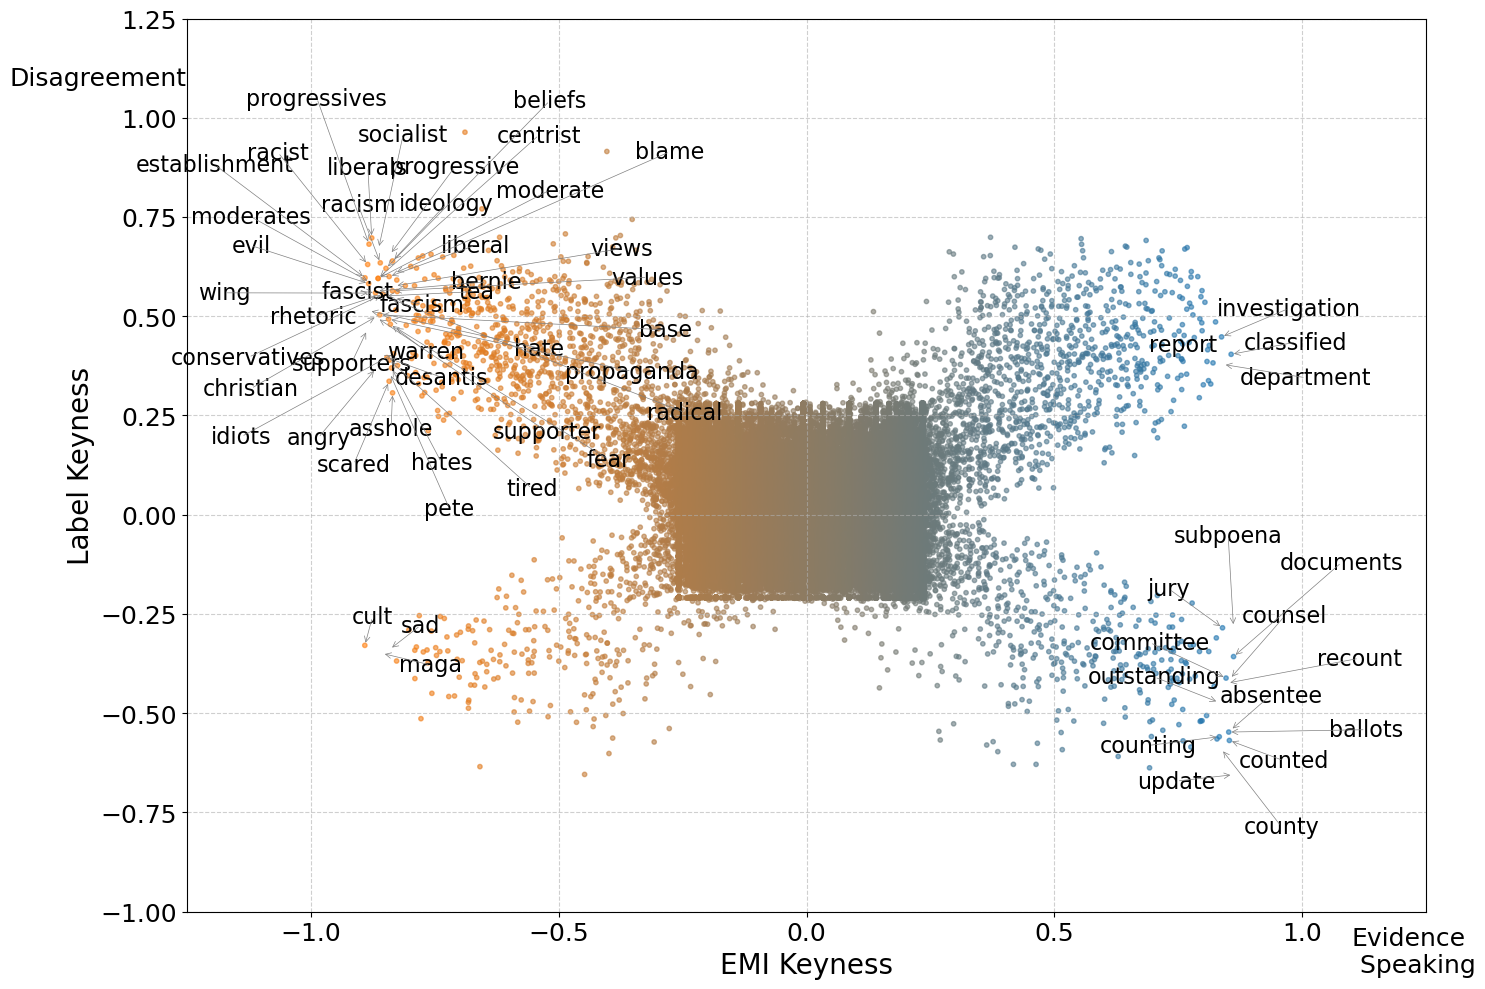

In [29]:
sample = finetuned_EMI_v1.sample(n = 100000, random_state = 100)

# Prepare color map based on x-values
norma = mcolors.Normalize(vmin=sample["SFS_EMI"].min(), vmax=sample["SFS_EMI"].max())
cmap = mcolors.LinearSegmentedColormap.from_list("custom_scale", ["#FF7F0E", "#1F77B4"])
colors = cmap(norma(sample["SFS_EMI"]))


# Create scatter plot

plt.figure(figsize=(15, 10))
plt.scatter(
    x=sample["SFS_EMI"],
    y=sample["SFS_label"],
    c=colors,
    s=10,
    alpha = 0.6
)

# Add grid and labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("EMI Keyness", fontsize=20)
plt.ylabel("Label Keyness", fontsize=20)
plt.tick_params(axis='both', labelsize=18)

plt.xlim(-1.25, 1.25)
plt.ylim(-1, 1.25)

# Annotate selected points
texts = []
for _, row in finetuned_EMI_v1.iterrows():
    x, y = row["SFS_EMI"], row["SFS_label"]
    if (x > 0.83 or x < -0.83):
        texts.append(plt.text(x, y, row["word"], fontsize=16, alpha=1))

# Automatically adjust text to reduce overlaps
adjust_text(texts, 
            arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),
            expand_points=(5, 5),
            force_text=5,
            force_points=3)

plt.text(1.1, -1.1, 'Evidence\n Speaking', va='center', ha='left', fontsize=18)
plt.text(-1.25, 1.1, 'Disagreement', va='center', ha='right', fontsize=18)



plt.tight_layout()
plt.savefig("plots/Keyness_Plot_EMI_Label.pdf", bbox_inches='tight')
# save lowe resolution for thesis printing
plt.savefig("plots/Keyness_Plot_EMI_Label.png", bbox_inches='tight', dpi = 300)

plt.show()


# **Ideology and EMI**

In [31]:
user_scores = pd.read_csv(f"../../user_ideology/user_positioning.csv")
user_scores

,User,Partisan_Score
0,mukhasim,-0.025850
1,fiplefip,0.040918
2,bobcat,-0.010514
3,mothramantra,-0.001673
4,postnationalism,0.022297
...,...,...
804509,the_general0186,-0.062967
804510,theenightmancometh,0.037424
804511,thegassykid,-0.055808
804512,the_end_of_memes,0.020002


In [32]:
# drop na and make lower case

user_scores = user_scores.dropna().reset_index(drop = True)
user_scores

,User,Partisan_Score
0,mukhasim,-0.025850
1,fiplefip,0.040918
2,bobcat,-0.010514
3,mothramantra,-0.001673
4,postnationalism,0.022297
...,...,...
802596,the_general0186,-0.062967
802597,theenightmancometh,0.037424
802598,thegassykid,-0.055808
802599,the_end_of_memes,0.020002


In [ ]:
texts_finetuned_EMI_user = texts_finetuned_EMI[texts_finetuned_EMI['author'].isin(user_scores['User'])].reset_index(drop = True)

#texts_self_EMI_user = texts_self_EMI[texts_self_EMI['author'].isin(user_scores['User'])].reset_index(drop = True)


# need to be reduced to those, belonging to user ideology

In [34]:
print("Share finetuned:", len(texts_finetuned_EMI_user) / len(texts_finetuned_EMI))
#print("Share self:", len(texts_self_EMI_user) / len(texts_self_EMI))

Share finetuned: 0.4593282632015223


## Keyness by EMI

In [35]:

finetuned_word_counts_EMI_v1_user = get_word_precision_and_frequency(texts_finetuned_EMI_user, 'finetuned', 'v1')
#finetuned_word_counts_EMI_v2_user = get_word_precision_and_frequency(texts_finetuned_EMI_user, 'finetuned', 'v2')

#self_word_counts_EMI_v1_user = get_word_precision_and_frequency(texts_self_EMI_user, 'self', 'v1')
#self_word_counts_EMI_v2_user = get_word_precision_and_frequency(texts_self_EMI_user, 'self', 'v2')


In [ ]:
# Scaled F Score
# apply


finetuned_word_counts_EMI_v1_user = calculate_sfs(finetuned_word_counts_EMI_v1_user)
#finetuned_word_counts_EMI_v2_user = calculate_sfs(finetuned_word_counts_EMI_v2_user)

#self_word_counts_EMI_v1_user = calculate_sfs(self_word_counts_EMI_v1_user)
#self_word_counts_EMI_v2_user = calculate_sfs(self_word_counts_EMI_v2_user)


## Keyness by label

In [39]:
texts_finetuned_label_user = texts_finetuned_label[texts_finetuned_label['author'].isin(user_scores['User'])].reset_index(drop = True)
#texts_self_label_user = texts_self_label[texts_self_label['author'].isin(user_scores['User'])].reset_index(drop = True)


# need to be reduced to those, belonging to user ideology

In [40]:
print("Share finetuned:", len(texts_finetuned_label_user) / len(texts_finetuned_label))
#print("Share self:", len(texts_self_label_user) / len(texts_self_label))

Share finetuned: 0.4555072847751848


In [ ]:

finetuned_word_counts_label_user = get_word_precision_and_frequency_label(texts_finetuned_label_user, 'label_d')

#self_word_counts_label_user = get_word_precision_and_frequency_label(texts_self_label_user, 'label_d')


In [43]:
# Scaled F Score

# apply
finetuned_word_counts_label_user = calculate_sfs_label(finetuned_word_counts_label_user)

#self_word_counts_label_user = calculate_sfs_label(self_word_counts_label_user)


## Keyness by user

* each text has one author who has one score, so drop duplicates again

In [44]:
# finetuned

parents_finetuned = EMI_df[['msg_id_parent', 'author_parent','parent_tokens', 'parent_len', 
                            'finetuned_parent_len_EMI_z_trans', 'finetuned_parent_len_norm_z_trans_EMI', 
                            'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_parent').reset_index(drop = True)



parents_finetuned = parents_finetuned.rename(columns = {'msg_id_parent': 'id', 'author_parent' : 'author', 'parent_tokens' : 'tokens', 'parent_len': 'len',
                                                        'finetuned_parent_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                        'finetuned_parent_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


parents_finetuned['type'] = 'parent'

# ---------------------------------------------------
children_finetuned = EMI_df[['msg_id_child', 'author_child', 'child_tokens', 'child_len', 
                             'finetuned_child_len_EMI_z_trans', 'finetuned_child_len_norm_z_trans_EMI',
                             'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_child').reset_index(drop = True)


children_finetuned = children_finetuned.rename(columns = {'msg_id_child': 'id',  'author_child' : 'author', 'child_tokens' : 'tokens', 'child_len': 'len',
                                                          'finetuned_child_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                          'finetuned_child_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


children_finetuned['type'] = 'child'
# ---------------------------------------------------
submissions_finetuned = EMI_df[['submission_id', 'author_submission', 'submission_tokens', 'submission_len',
                                'finetuned_submission_len_EMI_z_trans','finetuned_submission_len_norm_z_trans_EMI',
                                'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'submission_id').reset_index(drop = True)


submissions_finetuned = submissions_finetuned.rename(columns = {'submission_id': 'id', 'author_submission' : 'author', 'submission_tokens' : 'tokens', 'submission_len': 'len',
                                                                'finetuned_submission_len_EMI_z_trans' : 'finetuned_len_EMI_z_trans',
                                                                'finetuned_submission_len_norm_z_trans_EMI' : 'finetuned_len_norm_z_trans_EMI'})


submissions_finetuned['type'] = 'submission'



texts_finetuned_user = pd.concat([parents_finetuned, children_finetuned]).reset_index(drop = True)
texts_finetuned_user


,id,author,tokens,len,finetuned_len_EMI_z_trans,finetuned_len_norm_z_trans_EMI,predictions_score_ft,predictions_ft,type
0,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.476542,0.514532,0.6180,no_disagreement,parent
1,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.269695,0.269966,0.9507,disagree,parent
2,c7edr13,TehNoff,wrong,1,-1.058486,-0.620579,0.8633,no_disagreement,parent
3,c7ee45j,IBiteYou,adhering askscience style moderation could ela...,6,0.249878,0.296310,0.9126,no_disagreement,parent
4,c7ejopx,DublinBen,promote,1,-0.921904,-0.907752,0.9395,no_disagreement,parent
...,...,...,...,...,...,...,...,...,...
6916399,kfmd52k,Knightforlife,fact checking doesnt work one hears alarming true,8,0.757736,0.671616,0.9550,no_disagreement,child
6916400,kforzbx,bakerfredricka,spot interpretation really going,4,-0.200630,-0.043416,0.9920,no_disagreement,child
6916401,kfp6tzv,glassjar1,voting nearly simple first past post system al...,155,-0.257866,-0.140261,0.8500,disagree,child
6916402,kfp8xh8,HaulinBoats,also try explaining biden better trump support...,14,-0.985383,-0.617072,0.9414,no_disagreement,child


In [45]:
# self

parents_self = EMI_df[['msg_id_parent', 'author_parent', 'parent_tokens', 'parent_len', 
                            'self_parent_len_EMI_z_trans', 'self_parent_len_norm_z_trans_EMI', 
                            'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_parent').reset_index(drop = True)



parents_self = parents_self.rename(columns = {'msg_id_parent': 'id', 'author_parent' : 'author', 'parent_tokens' : 'tokens', 'parent_len': 'len',
                                                        'self_parent_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                        'self_parent_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


parents_self['type'] = 'parent'

# ---------------------------------------------------
children_self = EMI_df[['msg_id_child', 'author_child', 'child_tokens', 'child_len', 
                             'self_child_len_EMI_z_trans', 'self_child_len_norm_z_trans_EMI',
                             'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'msg_id_child').reset_index(drop = True)


children_self = children_self.rename(columns = {'msg_id_child': 'id', 'author_child' : 'author', 'child_tokens' : 'tokens', 'child_len': 'len',
                                                          'self_child_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                          'self_child_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


children_self['type'] = 'child'
# ---------------------------------------------------
submissions_self = EMI_df[['submission_id', 'author_submission', 'submission_tokens', 'submission_len',
                                'self_submission_len_EMI_z_trans','self_submission_len_norm_z_trans_EMI',
                                'predictions_score_ft','predictions_ft']].drop_duplicates(subset = 'submission_id').reset_index(drop = True)


submissions_self = submissions_self.rename(columns = {'submission_id': 'id', 'author_submission' : 'author', 'submission_tokens' : 'tokens', 'submission_len': 'len',
                                                                'self_submission_len_EMI_z_trans' : 'self_len_EMI_z_trans',
                                                                'self_submission_len_norm_z_trans_EMI' : 'self_len_norm_z_trans_EMI'})


submissions_self['type'] = 'submission'



texts_self_user = pd.concat([parents_self, children_self]).reset_index(drop = True)
texts_self_user


,id,author,tokens,len,self_len_EMI_z_trans,self_len_norm_z_trans_EMI,predictions_score_ft,predictions_ft,type
0,c7ecp8d,Ramblin_Dash,regarding perry vs brown current name prop cas...,65,0.711538,0.624110,0.6180,no_disagreement,parent
1,c7efx8q,senatorskeletor,suspect going split baby striking doma upholdi...,123,0.150568,0.130100,0.9507,disagree,parent
2,c7edr13,TehNoff,wrong,1,-1.365538,-1.228132,0.8633,no_disagreement,parent
3,c7ee45j,IBiteYou,adhering askscience style moderation could ela...,6,0.241266,0.203621,0.9126,no_disagreement,parent
4,c7ejopx,DublinBen,promote,1,-0.704820,-0.632541,0.9395,no_disagreement,parent
...,...,...,...,...,...,...,...,...,...
6916399,kfmd52k,Knightforlife,fact checking doesnt work one hears alarming true,8,0.720232,0.498045,0.9550,no_disagreement,child
6916400,kforzbx,bakerfredricka,spot interpretation really going,4,-0.295144,-0.381238,0.9920,no_disagreement,child
6916401,kfp6tzv,glassjar1,voting nearly simple first past post system al...,155,-0.075895,-0.122822,0.8500,disagree,child
6916402,kfp8xh8,HaulinBoats,also try explaining biden better trump support...,14,-0.749237,-0.789836,0.9414,no_disagreement,child


In [46]:
texts_finetuned_user = texts_finetuned_user.merge(user_scores, left_on = "author", right_on = "User", how = "inner").reset_index(drop = True)
#texts_self_user = texts_self_user.merge(user_scores, left_on = "author", right_on = "User", how = "inner").reset_index(drop = True)

In [47]:
texts_finetuned_user = texts_finetuned_user.dropna().reset_index(drop = True)
#texts_self_user = texts_self_user.dropna().reset_index(drop = True)

In [ ]:
# count, how many words appear in E texts, and how many appear in I texts


def get_word_counts_user(df, col):
    
    # get all agree and disagree texts
    df_l = df[df[col] < 0]
    df_r = df[df[col] >= 0]

    l_word_count = df_l['len'].sum()
    r_word_count = df_r['len'].sum()

    
    return l_word_count, r_word_count

In [50]:

def get_word_precision_and_frequency_user(df, user_col):

    
    # group texts based on ideology
    category = f"category_{user_col}"
    df[category] = df['Partisan_Score'] < 0
    
    # get words and counts
    all_words = Counter(word for text in df["tokens"] for word in text.split())
    
    l_counts = Counter(word for text, cat in zip(df["tokens"], df[category]) if cat for word in text.split())
    r_counts = Counter(word for text, cat in zip(df["tokens"], df[category]) if not cat for word in text.split())

    # Build result DataFrame
    result_df = pd.DataFrame({
        "word": list(all_words.keys()),
        "total_count": list(all_words.values()),
        "count_l": [l_counts[word] for word in all_words],
        "count_r": [r_counts[word] for word in all_words]
    })

    result_df['prec_l'] = result_df['count_l'] / result_df['total_count']
    result_df['prec_r'] = result_df['count_r'] / result_df['total_count']

    l_word_count, r_word_count = get_word_counts_user(df, 'Partisan_Score')
    #print( E_word_count)
    #print(I_word_count)

    result_df['freq_l'] = result_df['count_l'] / l_word_count
    result_df['freq_r'] = result_df['count_r'] / r_word_count
    
    return result_df



# ---------------------

finetuned_word_counts_user = get_word_precision_and_frequency_user(texts_finetuned_user, 'user_l')

#self_word_counts_user = get_word_precision_and_frequency_user(texts_self_user, 'user_l')


In [52]:
# Scaled F Score

def calculate_sfs_user(df):
    
    def scale_and_standardize(value, mean, std):
        # Standardizing value using z-score
        return (value - mean) / std

    # Calculate the mean and std for precision and frequency (for E and I categories)
    precision_l_mean = df['prec_l'].mean()
    precision_l_std = df['prec_l'].std()
    precision_r_mean = df['prec_r'].mean()
    precision_r_std = df['prec_r'].std()

    frequency_l_mean = df['freq_l'].mean()
    frequency_l_std = df['freq_l'].std()
    frequency_r_mean = df['freq_r'].mean()
    frequency_r_std = df['freq_r'].std()

    # Scale and standardize precision and frequency for E and I
    df['precision_l_scaled'] = df['prec_l'].apply(scale_and_standardize, args=(precision_l_mean, precision_l_std))
    df['precision_r_scaled'] = df['prec_r'].apply(scale_and_standardize, args=(precision_r_mean, precision_r_std))

    df['frequency_l_scaled'] = df['freq_l'].apply(scale_and_standardize, args=(frequency_l_mean, frequency_l_std))
    df['frequency_r_scaled'] = df['freq_r'].apply(scale_and_standardize, args=(frequency_r_mean, frequency_r_std))

    df['precision_l_scaled'] = norm.cdf(df['precision_l_scaled'])
    df['precision_r_scaled'] = norm.cdf(df['precision_r_scaled'])

    df['frequency_l_scaled'] = norm.cdf(df['frequency_l_scaled'])
    df['frequency_r_scaled'] = norm.cdf(df['frequency_r_scaled'])

    # Calculate the harmonic mean of precision and frequency for each category
    def harmonic_mean(a, b):
        # Harmonic mean formula
        return 2 * a * b / (a + b)

    df['SFS_l'] = df.apply(lambda row: harmonic_mean(row['precision_l_scaled'], row['frequency_l_scaled']), axis=1)
    df['SFS_r'] = df.apply(lambda row: harmonic_mean(row['precision_r_scaled'], row['frequency_r_scaled']), axis=1)

    # combine final scores
    def combine_sfs(row):
        if row['SFS_l'] > row['SFS_r']:
            return 2* (-0.5 + row['SFS_l'])
        elif row['SFS_r'] > row['SFS_l']:
            return 2 * (-0.5 + (1 - row['SFS_r']))
        else:
            return 2 * (-0.5 + 0)

    # def combine_sfs(row):
    #     denom = row['SFS_d'] + row['SFS_nd']
    #     return (row['SFS_d'] - row['SFS_nd']) / denom if denom != 0 else 0

    df['SFS_user'] = df.apply(combine_sfs, axis=1)


    return df


# apply

finetuned_word_counts_user = calculate_sfs_user(finetuned_word_counts_user)

#self_word_counts_user = calculate_sfs_user(self_word_counts_user)


# **Plot**

In [ ]:
# merge
finetuned_EMI_v1_user = pd.merge(finetuned_word_counts_EMI_v1_user[["word", "SFS_EMI"]], finetuned_word_counts_user[["word", "SFS_user"]],
                             left_on = "word", right_on="word")

#finetuned_EMI_v2_user = pd.merge(finetuned_word_counts_EMI_v2_user[["word", "SFS_EMI"]], finetuned_word_counts_user[["word", "SFS_user"]], 
#                            left_on = "word", right_on="word")


#self_EMI_v1_user = pd.merge(self_word_counts_EMI_v1_user[["word", "SFS_EMI"]], self_word_counts_user[["word", "SFS_user"]],
#                             left_on = "word", right_on="word")
#self_EMI_v2_user =  pd.merge(self_word_counts_EMI_v2_user[["word", "SFS_EMI"]], self_word_counts_user[["word", "SFS_user"]], 
#                            left_on = "word", right_on="word")


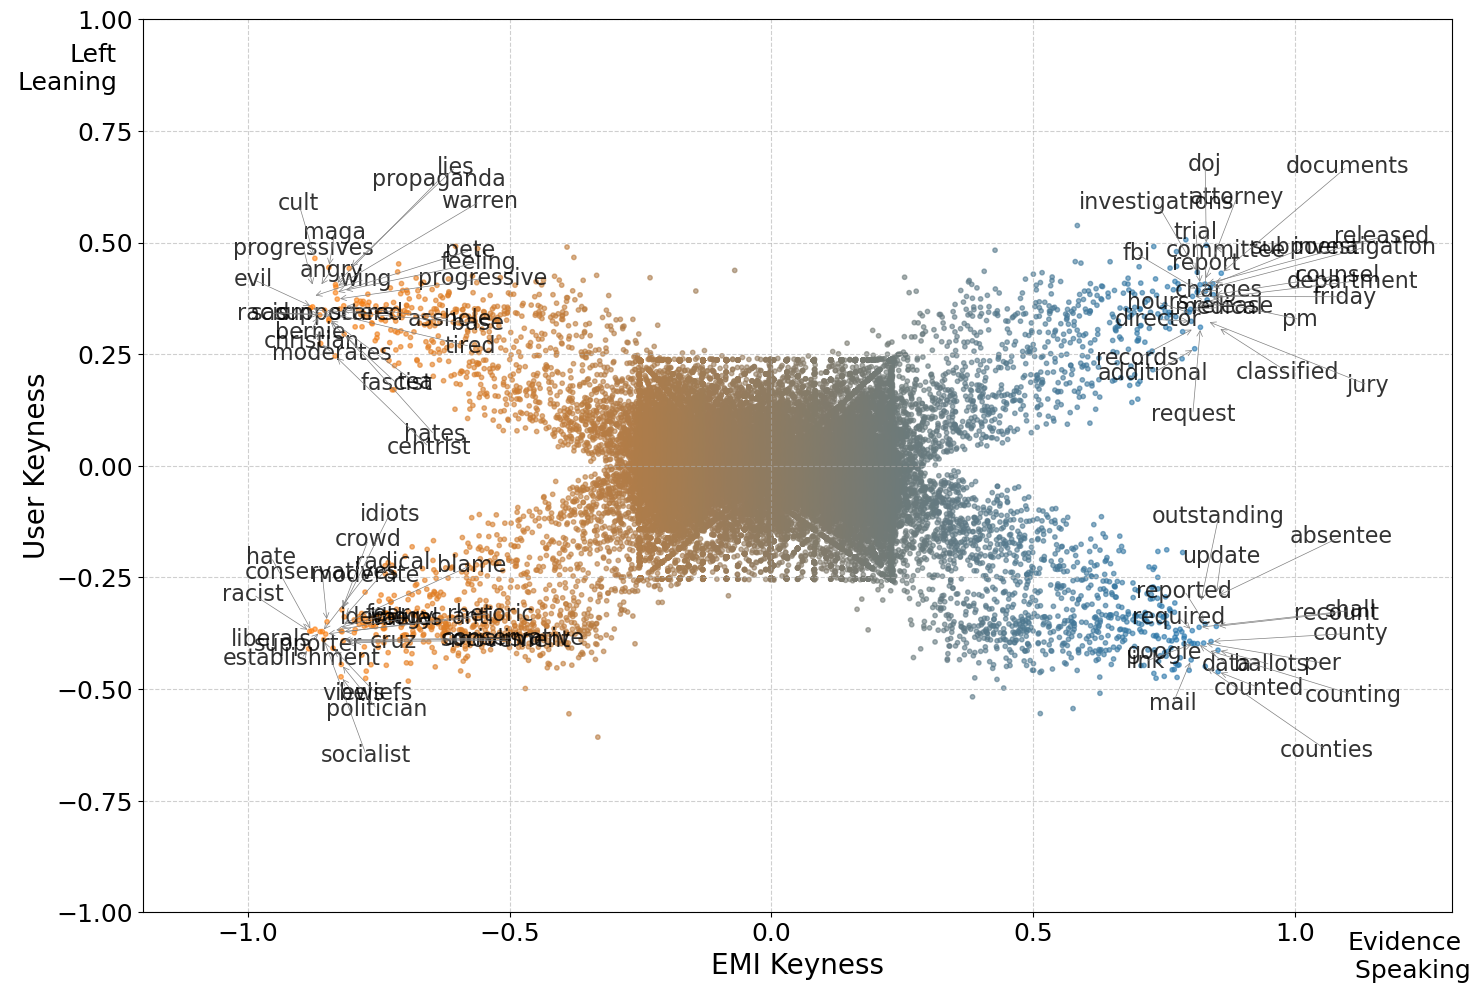

In [55]:
sample = finetuned_EMI_v1_user.sample(n = 100000, random_state = 100)


# Prepare color map based on x-values
norma = mcolors.Normalize(vmin=sample["SFS_EMI"].min(), vmax=sample["SFS_EMI"].max())
cmap = mcolors.LinearSegmentedColormap.from_list("custom_scale", ["#FF7F0E", "#1F77B4"])
colors = cmap(norma(sample["SFS_EMI"]))


# Create scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(
    x=sample["SFS_EMI"],
    y=sample["SFS_user"],
    c=colors,
    s=10,
    alpha = 0.6
)

# Add grid and labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("EMI Keyness", fontsize = 20)
plt.ylabel("User Keyness", fontsize = 20)
plt.tick_params(axis='both', labelsize=18)


plt.xlim(-1.2, 1.3)
plt.ylim(-1, 1)

# Annotate selected points
texts = []
for _, row in finetuned_EMI_v1_user.iterrows():
    x, y = row["SFS_EMI"], row["SFS_user"]
    if (x > 0.8 or x < -0.8):
        texts.append(plt.text(x, y, row["word"], fontsize=16, alpha=0.8))

# Automatically adjust text to reduce overlaps
adjust_text(texts, 
            arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),
            expand_points=(5, 5),
            force_text=5,
            force_points=3)


plt.text(1.1, -1.1, 'Evidence\n Speaking', va='center', ha='left', fontsize=18)
plt.text(-1.25, 0.89, 'Left\n Leaning', va='center', ha='right', fontsize=18)


plt.tight_layout()
plt.savefig("plots/Keyness_Plot_EMI_User.pdf", bbox_inches='tight')
# save lowe resolution for thesis printing
plt.savefig("plots/Keyness_Plot_EMI_User.png", bbox_inches='tight', dpi = 300)

plt.show()

# top more left leaning

In [57]:
# merge
finetuned_label_user = pd.merge(finetuned_word_counts_label[["word", "SFS_label"]], finetuned_word_counts_user[["word", "SFS_user"]],
                             left_on = "word", right_on="word")




#self_label_user = pd.merge(self_word_counts_label_user[["word", "SFS_label"]], self_word_counts_user[["word", "SFS_user"]],
#                             left_on = "word", right_on="word")


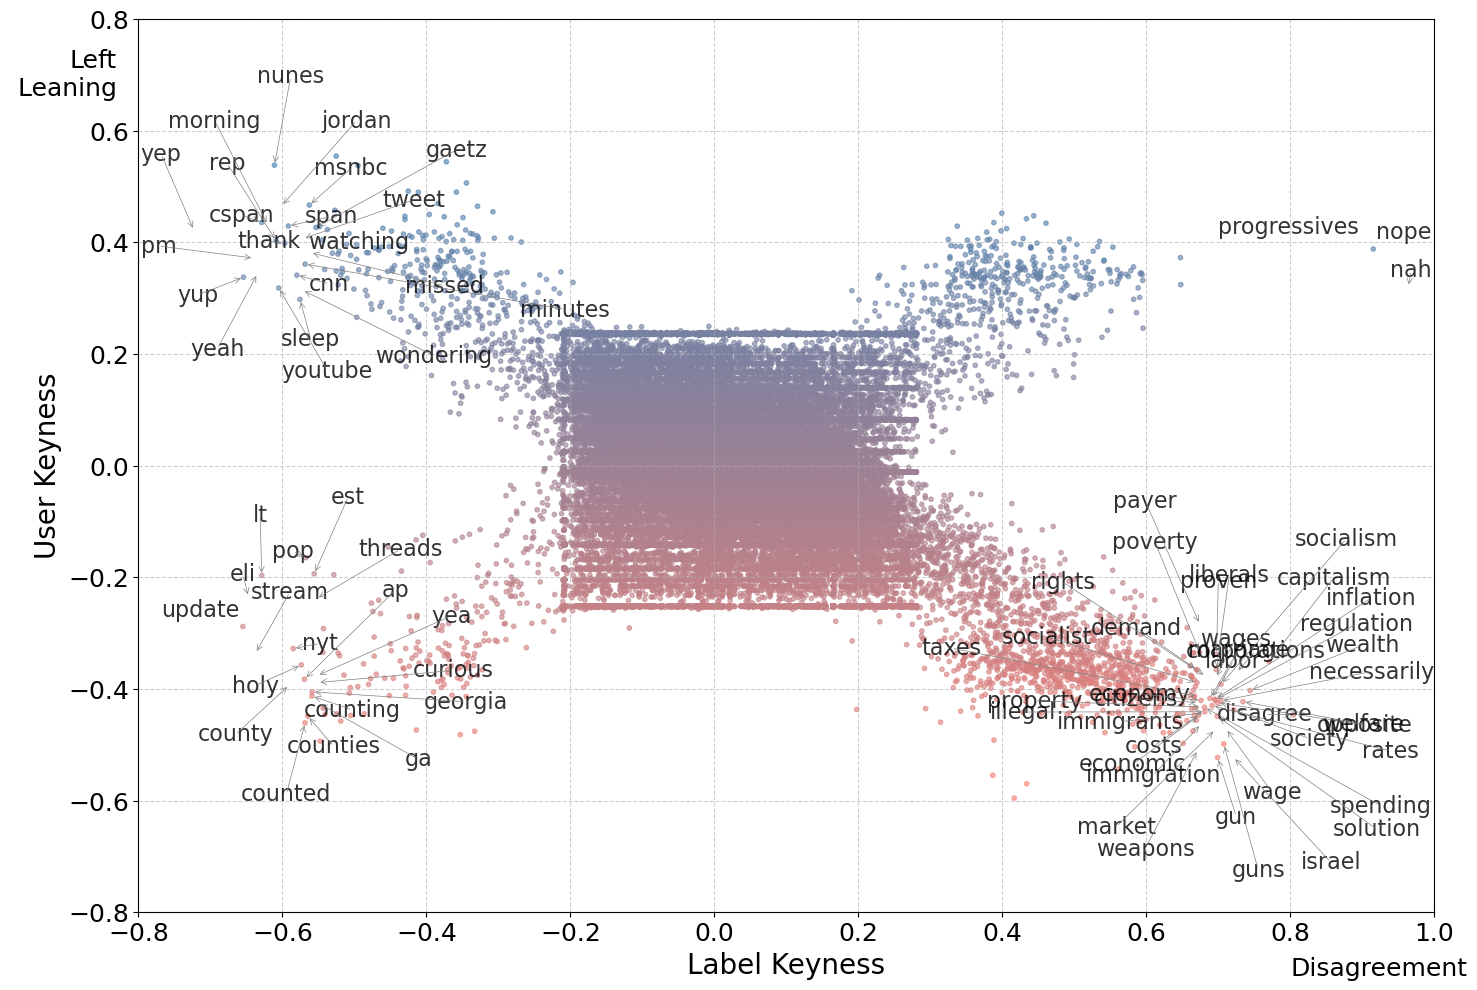

In [58]:
sample = finetuned_label_user.sample(n = 100000, random_state = 100)


# Prepare color map based on x-values
norma = mcolors.Normalize(vmin=sample["SFS_user"].min(), vmax=sample["SFS_user"].max())
cmap = mcolors.LinearSegmentedColormap.from_list("custom_scale", ["salmon", "steelblue"])
colors = cmap(norma(sample["SFS_user"]))


# Create scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(
    x=sample["SFS_label"],
    y=sample["SFS_user"],
    c=colors,
    s=10,
    alpha = 0.6
)

# Add grid and labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Label Keyness", fontsize=20)
plt.ylabel("User Keyness", fontsize=20)
plt.tick_params(axis='both', labelsize=18)

plt.xlim(-0.8, 1)
plt.ylim(-0.8, 0.8)

# Annotate selected points
texts = []
for _, row in finetuned_label_user.iterrows():
    x, y = row["SFS_label"], row["SFS_user"]
    if (x > 0.67 or x < -0.55):
        texts.append(plt.text(x, y, row["word"], fontsize=16, alpha=0.8))

# Automatically adjust text to reduce overlaps
adjust_text(texts, 
            arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),
            expand_points=(5, 5),
            force_text=5,
            force_points=3)

plt.text(0.8, -0.9, 'Disagreement', va='center', ha='left', fontsize=18)
plt.text(-0.83, 0.7, 'Left\n Leaning', va='center', ha='right', fontsize=18)

plt.tight_layout()
plt.savefig("plots/Keyness_Plot_Label_User.pdf", bbox_inches='tight')
# save lowe resolution for thesis printing
plt.savefig("plots/Keyness_Plot_Label_User.png", bbox_inches='tight', dpi = 300)

plt.show()

# top more left leaning